### Loading the required Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor#
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import re
import os
import time
import plotly.express as px

In [ ]:
# Regular for exploratory data analaysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.metrics import precision_score , recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

### Using Pandas DataFrame to read the csv file and to explore the data better

In [ ]:
data= pd.read_csv("/content/heart_claveland.csv")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


## Exploratory Data Analysis (EDA)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [ ]:
# everything is numeric
data.dtypes  # the various data types

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
# Number of unique datasets observartions:

data.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [ ]:
data.rename({'condition': 'target'},axis =1 ,inplace = True)

In [ ]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
# Renaming columns.
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'st_depression', 'oldpeak', 'ca', 'thal', 'target']

## Data Pre-processing


##### Check if there are missing values

In [ ]:
#lets see the shape of the dataset
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 297
Number of columns: 14


In [ ]:
data.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
st_depression    0
oldpeak          0
ca               0
thal             0
target           0
dtype: int64

##### No Null Value

## Checking various datatype


##### This infomation below shows 11 fatures and one binary target. However, a breif infomation about the features are given below.

##### There are 14 columns in the datasets which contain the following:
1. Age ->The age of the patient.

2. Sex ->The gender of the patient. (1 =
          male, 0=female)

3. cp. Type of chest pain               (1= typical   angina, 2= atypical angina, 3= non-anginal pain, 4= asymptotic).

4. trestbps. Resting blood pressure in mmHg.

5. chol. Serum holestero in mg/di.

6. fbs. Fasting Blood Sugar (1= fasting blood sugar is more than 120mg/di, 0 = otherwise).

7. restecg, Resting ElectroCardioGraphics results (0 = normal, i = ST-T wave abnormality, 2 = left ventricular hyperthrophy).

8. Thalech. Max heart rate achieved.

9. Exang. Exercise induced angina (1= yes, 0= no).

10. Oldpeak. St depression induced by exercise relative to rest.

11. slope, peak exercise ST segment (1= upsloping, 2= flat, 3= downsloping).

12. ca. Number of major vessels (0-3) colored by flourosopy

13. thai. Thalessemia (3= normal, 6= fixed defect, 7= reversible defect)

14. target. Diagnosis of heart disease (0= absence, 1, 2, 3, 4 = present)

## Data Visualization

##### Using seborn to do further visualization process

### Model Training


##### Logistics Regression

##### Splitting the features and the target

In [ ]:
# figure out the target and the class
# 1 = has heart disease
# 2 = no heart disease
data.target.value_counts().rename({1 :'has disease',0 :'has no disease'})


has no disease    160
has disease       137
Name: target, dtype: int64

In [ ]:
df2 = data.copy()

In [ ]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

In [ ]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

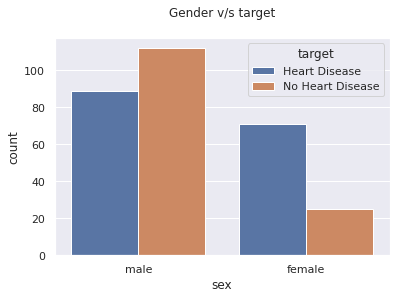

In [ ]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

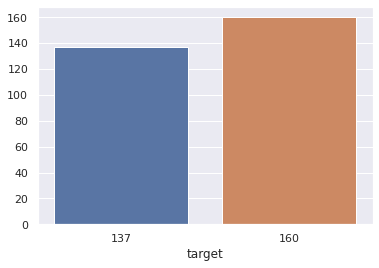

In [ ]:
fig,ax=plt.subplots()
sns.barplot(data = data.target.value_counts().rename({1 :'has disease',0 :'has no disease'}), \
           x = data.target.value_counts().rename({1 :'has disease',0 :'has no disease'}).index, \
           y=data.target.value_counts().rename({1 :'has disease',0 :'has no disease'}).values,)

##### checking patient who are affected by chest pain in the datasets

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

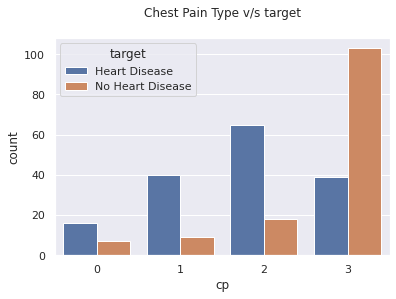

In [ ]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


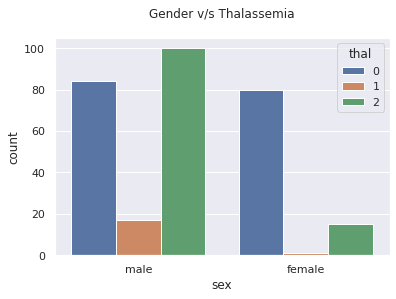

In [ ]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

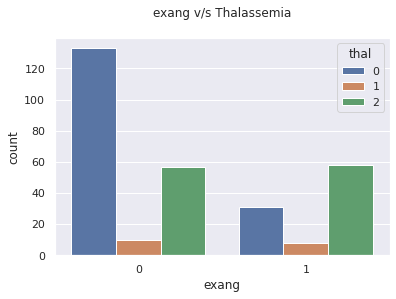

In [ ]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

## Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

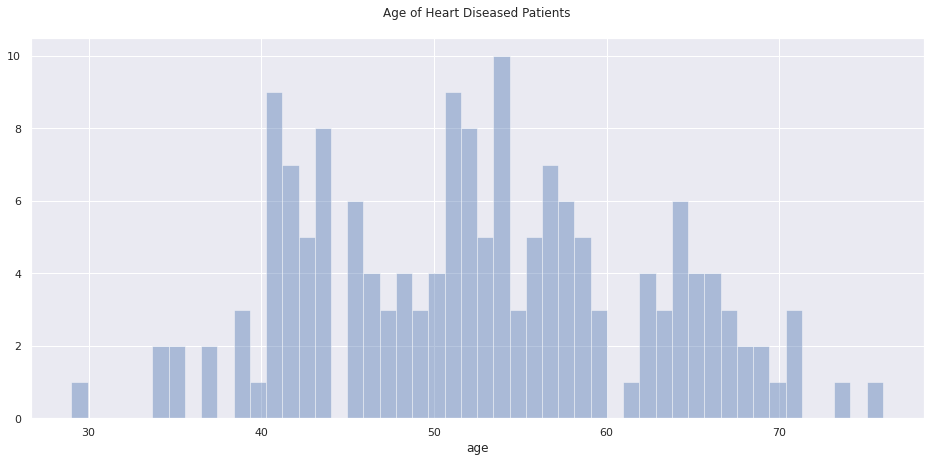

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

### Jointplot

In [ ]:
df3 = data[data['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'st_depression', 'oldpeak', 'ca', 'thal', 'target']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


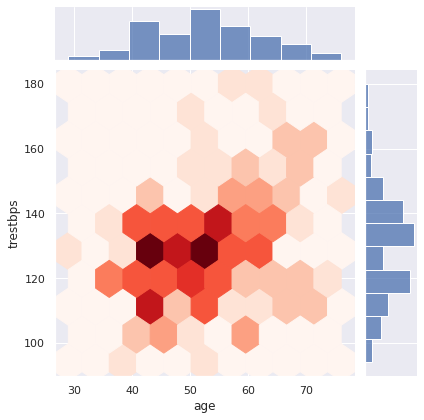

In [ ]:
pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'

              )

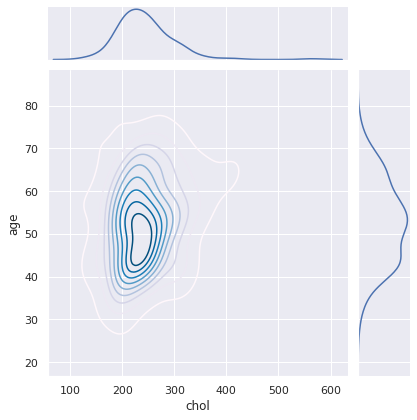

In [ ]:
sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

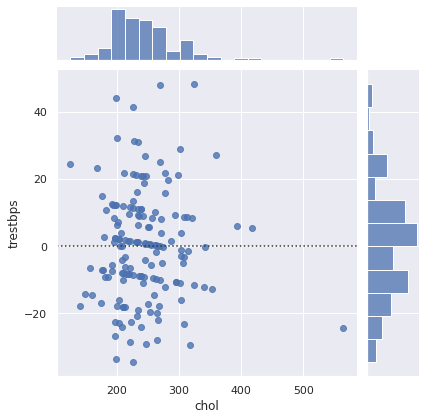

In [ ]:
sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',

              )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

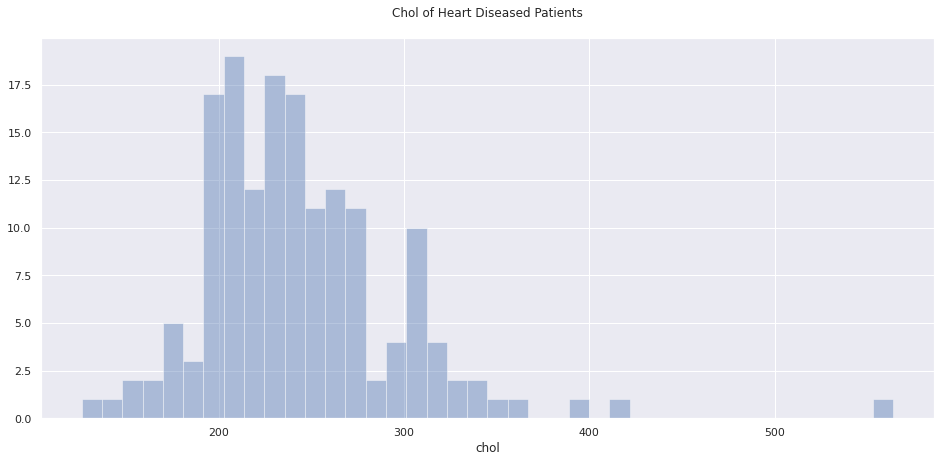

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

#### Anaysing further by checking heart disease by Sex

In [ ]:
ast = data.loc[:, ['sex', 'target']]
ast.groupby('sex').count()

,target
sex,
0,96
1,201


In [ ]:
ast1 = pd.crosstab(ast.sex, ast.target).rename({0:'no disease', 1: 'has disease'}, axis = 1)\
.rename({0:'female', 1: 'male'}, axis = 0).T
ast1

sex,female,male
target,,
no disease,71,89
has disease,25,112


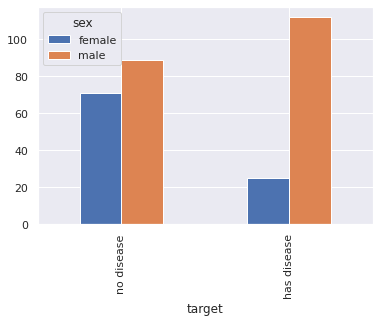

In [ ]:
ast1.plot( kind = 'bar')

##### Checking further Analysis for age distribution

In [ ]:
# data analysis - age distribution
age_explore = data['age'].value_counts(ascending = False)
age_explore.head()

58    18
57    17
54    16
59    14
60    12
Name: age, dtype: int64

[Text(0, 0.5, 'number'), Text(0.5, 0, 'age')]

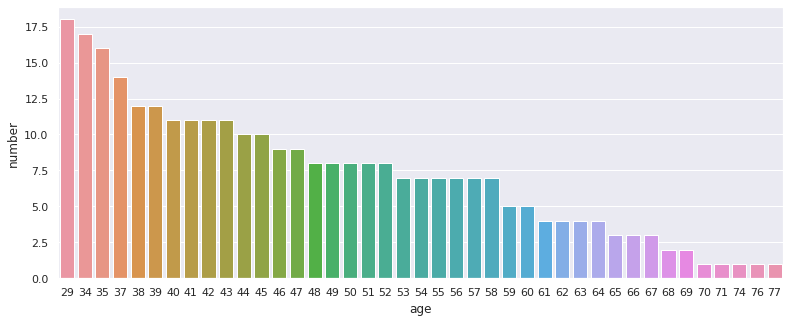

In [ ]:
fig,ax= plt.subplots(figsize = (13,5))
sns.barplot(x =age_explore.index.sort_values(),y = age_explore.values)
ax.set(xlabel = 'age', ylabel = 'number')

##### Checking further Analysis for sex distribution

In [ ]:
sex_explore = data.loc[:,'sex'].to_frame()

In [ ]:
sex_explore['label'] = ['male' if i == 1  else 'female' for i in sex_explore.sex]

In [ ]:
sex_explore.label.value_counts()

male      201
female     96
Name: label, dtype: int64

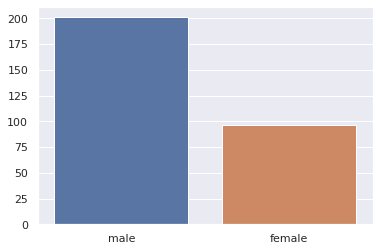

In [ ]:
sns.barplot(x =sex_explore.label.value_counts().index, y = sex_explore.label.value_counts().values);

##### Checking the feature correlations

In [ ]:
data.describe()[:3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,st_depression,oldpeak,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340


In [ ]:
features = data
features.corr()[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,st_depression,oldpeak,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285


##### Checking the heat map for features

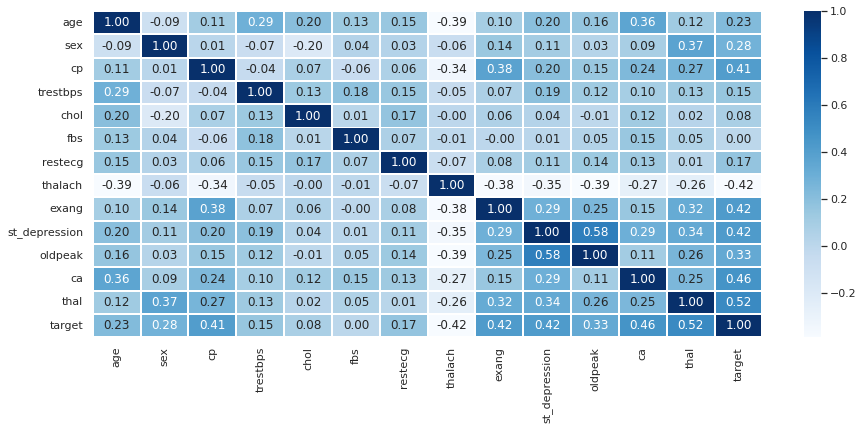

In [ ]:
fig.ax =plt.subplots(figsize = (15,6))
sns.heatmap(features.corr(), annot = True, robust = True,cmap = 'Blues', linewidth = 1, fmt='0.2f');

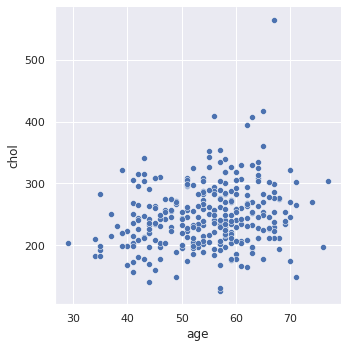

In [ ]:
sns.relplot(x =features.age, y =features.chol);

In [ ]:
features.age.corr(features.chol)

0.2026435458466268

## Modelling Machine Learning

In [ ]:
data['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

1---> Defective Heart

0---> Healthy Heart

##### Splitting the features and target

In [ ]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,st_depression,oldpeak,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [ ]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: target, Length: 297, dtype: int64

##### Splitting the Data into Training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4,  random_state= 1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(297, 13) (178, 13) (119, 13)


## Model Training



##### Logistic Regression

In [ ]:
model_1 = LogisticRegression()

In [ ]:
# Training the LogisticRegression model with Training data

model_1.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## Evaluate Model


##### Accuracy score

In [ ]:
# accuracy on the training data

X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accurcy on Training data : ', training_data_accuracy)

Accurcy on Training data :  0.8426966292134831


In [ ]:
# accuracy on the test data

X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accurcy on Test data : ', test_data_accuracy)

Accurcy on Test data :  0.8151260504201681


In [ ]:
Y.unique

<bound method Series.unique of 0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: target, Length: 297, dtype: int64>

### Building a predictive system

In [ ]:
input_data = ()

## Model Training

In [ ]:
X= data.drop('target', axis = 1)
y = data['target']

# seed
np.random.seed(10)

# train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


###########################################################################################
# fit model using RandomForestClassifier



clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)

#predict model
y_pred1= clf1.predict(X_test)

print()

print('Using the RandomForestRegressor')
print('**************************************')
#evaluate model
print(f'training score : {clf1.score(X_train, y_train)}')
print(f'test score: {clf1.score(X_test, y_test)}')
rf_accuracy_score = accuracy_score(y_test, y_pred1)
print()

###########################################################################################
# fit model using LogisticRegression

model = LogisticRegression()   # solver ='lbfgs', max_iter=2000
model.fit(X_train, y_train)

#predict model
y_pred2= model.predict(X_test)

#evaluate model
print('Using the LogisticRegressor')
print('**************************************')
print(f'training score : {model.score(X_train, y_train)}')
print(f'test score:  {model.score(X_test, y_test)}')
lr_accuracy_score = accuracy_score(y_test, y_pred2)
print()
###########################################################################################

print('Using the KNeighborsClassifier')
print('**************************************')
# fit model using KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
#predict model
y_pred3= neigh.predict(X_test)


print(f'training score : {neigh.score(X_train, y_train)}')
knn_accuracy_score =     neigh.score(X_test, y_test)
print(f'accuracy score:  {accuracy_score(y_test, y_pred3)*100:0.2f}%')


Using the RandomForestRegressor
**************************************
training score : 1.0
test score: 0.8166666666666667

Using the LogisticRegressor
**************************************
training score : 0.8523206751054853
test score:  0.8833333333333333

Using the KNeighborsClassifier
**************************************
training score : 0.7721518987341772
accuracy score:  60.00%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Model Evaluation

In [ ]:
model_evaluation = {'RandomForest score' :rf_accuracy_score,
              "LogisticRegressor score" :lr_accuracy_score,
              "KNeighbours score"    : knn_accuracy_score}

In [ ]:
model_score = pd.DataFrame(index = model_evaluation.keys(), \
data = (model_evaluation.values())\
, columns = ['accuracy_scores']).sort_values('accuracy_scores',ascending = False)
model_score

,accuracy_scores
LogisticRegressor score,0.883333
RandomForest score,0.816667
KNeighbours score,0.600000


##### visualising the model evaluation for better understanding

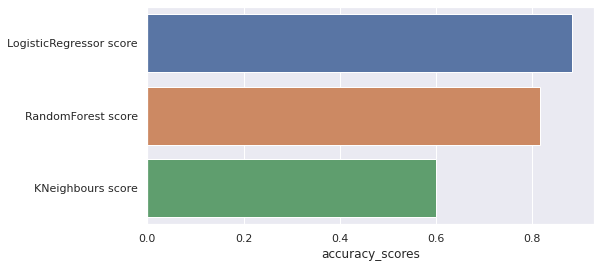

In [ ]:
fig,ax = plt.subplots(figsize= (8,4))
sns.barplot(data = model_score, y = model_score.index, \
            x= model_score.accuracy_scores, orient ='h');

##### for the confusion matrix -  I will be using the Logistic Regressor because it has the greatest score

In [ ]:
# Confusion Matrix
#clf1
confusion_matrix(y_test,y_pred2)

array([[29,  4],
       [ 3, 24]])

##### Visualising the result of the confusion matrix using heatmap

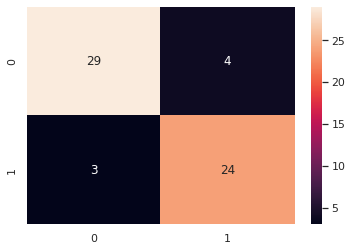

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot = True);

##### Checking the classification report

In [ ]:
cr = classification_report(y_test, y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.87        27

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



##### Precision Score

In [ ]:
precision_score(y_test, y_pred2)

0.8571428571428571

F1 Score

In [ ]:
f1_score(y_test, y_pred2)

0.8727272727272727

##### Turning the model with RandoMSearchCV Method

In [ ]:
# Randomized Search CV Tunining

# import hyperparameter tuning with randomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

grid = {"solver":['liblinear'],
       'C' : np.random.random(500),
       'max_iter':[250]}

# create seed
np.random.seed(10)

# create X and y
X= data.drop('target', axis = 1)
y = data['target']


# train and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2)

# instantiate RandomForest Classifier
logistic = LogisticRegression()  # n_jobs is the number of cores you want to use for computing

# setup RandomizedSearchCV
rs_clf =RandomizedSearchCV (estimator = logistic,
                          param_distributions = grid,
                          n_iter = 20,
                          cv=10,
                          verbose = 0)

# fint the RandomizedSearchCV version of fit
rs_clf.fit(X_train, y_train)

#print(rs_clf.score(X_test, y_test))
#**********************************************************************************************************************
# make predictions  with the best hyperparamaters
rs_ypreds = rs_clf.predict(X_test)

print(accuracy_score(y_test, rs_ypreds)*100)

90.0


In [ ]:
rs_clf.best_params_

{'C': 0.996989762789397, 'max_iter': 250, 'solver': 'liblinear'}

In [ ]:
model_score

,accuracy_scores
LogisticRegressor score,0.883333
RandomForest score,0.816667
KNeighbours score,0.600000


##### No significant improvemnt was observed after turning the LogisticRegressor score it still remain 88%